# Diet clustering by country

## CAN I PREDICT A PERSON'S ORIGIN BASED ON ITS DIET???

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

%matplotlib inline

## bringing in datasets (default datasets)
from sklearn import datasets
## metrics for scoring KNN
import sklearn.metrics as sm

from sklearn.cluster import KMeans

## KNN classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score

## RANDOM FOREST
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

## Import and clean the dataset

In [61]:
df= pd.read_csv('graphs.csv')

In [62]:
df.head()

,Unnamed: 0,superregion2,country,age,female,urban,edu,year,median,upperci_95,lowerci_95,name
0,0,SAARC,AFG,3.5,0,1,1,2018,40.732013,83.923357,19.839918,1
1,1,SAARC,AFG,57.5,1,999,999,2015,84.137934,139.280603,51.896189,1
2,2,SAARC,AFG,57.5,1,0,1,2018,53.166260,112.605145,25.462172,1
3,3,SAARC,AFG,7.5,1,0,999,2015,70.072893,133.233867,38.210643,1
4,4,SAARC,AFG,1.5,0,0,1,2015,21.713358,43.830357,10.484946,1


In [63]:
df.country.unique()

array(['AFG', 'AGO', 'ALB', 'ARE', 'ARG', 'ARM', 'ATG', 'AUS', 'AUT',
       'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS',
       'BIH', 'BLR', 'BLZ', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN', 'BWA',
       'CAF', 'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG',
       'COL', 'COM', 'CPV', 'CRI', 'CUB', 'CYP', 'CZE', 'DEU', 'DJI',
       'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ERI', 'ESP', 'EST',
       'ETH', 'FIN', 'FJI', 'FRA', 'FSM', 'GAB', 'GBR', 'GEO', 'GHA',
       'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GTM', 'GUY', 'HND',
       'HRV', 'HTI', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL',
       'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM',
       'KIR', 'KOR', 'KWT', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LKA',
       'LSO', 'LTU', 'LUX', 'LVA', 'MAR', 'MDA', 'MDG', 'MDV', 'MEX',
       'MHL', 'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MNG', 'MOZ', 'MRT',
       'MUS', 'MWI', 'MYS', 'NAM', 'NER', 'NGA', 'NIC', 'NLD', 'NOR',
       'NPL', 'NZL',

In [64]:
to_keep=["ITA","USA","CHN","PER","DNK","FRA","SWE","TZA","ESP"]

In [65]:
df=df[df['country'].isin(to_keep)]

In [66]:
df.columns

Index(['Unnamed: 0', 'superregion2', 'country', 'age', 'female', 'urban',
       'edu', 'year', 'median', 'upperci_95', 'lowerci_95', 'name'],
      dtype='object')

In [67]:
# drop columns I am not interested in
df=df.drop(['Unnamed: 0', 'superregion2', 'age', 'female', 'urban','edu', 'year', 'upperci_95', 'lowerci_95'], axis=1)

In [68]:
df

,country,median,name
527,CHN,129.423119,1
528,CHN,125.563189,1
529,CHN,111.502655,1
530,CHN,63.668388,1
531,CHN,77.997610,1
...,...,...,...
150785,USA,257.187718,57
150786,USA,243.877233,57
150787,USA,201.827451,57
150788,USA,160.694217,57


In [85]:
df['id']=df.index

In [2]:
## MAKE PIVOT TABLE WITH ALL THE FACTORS AFFECTING DIET

In [87]:
df1=df.pivot_table(values='median', index=['id','country'], columns="name")

In [90]:
df1.fillna(0, inplace=True)

In [98]:
df1.index.get_level_values('country')

Index(['CHN', 'CHN', 'CHN', 'CHN', 'CHN', 'CHN', 'CHN', 'CHN', 'CHN', 'CHN',
       ...
       'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA'],
      dtype='object', name='country', length=7344)

In [99]:
df1['country']=df1.index.get_level_values('country')

In [100]:
dict_country={'CHN':1, 'DNK':2, 'USA':3, 'FRA':4, 'SWE':5, 'PER':6, 'TZA':7, 'ESP':8, 'ITA':9}
df1['country_n']=df1['country'].map(dict_country) 

In [102]:
df1.reset_index(drop=True, inplace=True)

In [142]:
df1

name,1,2,3,4,5,6,7,8,9,10,...,48,49,50,51,52,53,54,57,country,country_n
0,129.423119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,CHN,1
1,125.563189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,CHN,1
2,111.502655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,CHN,1
3,63.668388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,CHN,1
4,77.997610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,CHN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7339,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,257.187718,USA,3
7340,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,243.877233,USA,3
7341,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201.827451,USA,3
7342,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.694217,USA,3


## Defining X and y

In [122]:
## set X and y

X = df1.drop(['country', 'country_n'], axis=1)
y = df1['country_n']

## Train/test split

In [123]:
## Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=124, stratify=y) # stratify means that it evenly take from each target group (y)

## Scaling

In [124]:
## Scaler : another tool to improve our models
#https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train) # fitting just on train

X_train = scaler.transform(X_train) # apply transformation on train
X_test = scaler.transform(X_test) # apply transformation on test

## KNN

In [125]:
errors = []

# running model for differet Ks
for k in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=k) # we do not know what K is going to be best
    knn.fit(X_train, y_train)
    pred_y = knn.predict(X_train)
    errors.append(np.mean(pred_y != y_train)) # very crude avg error rate for that K

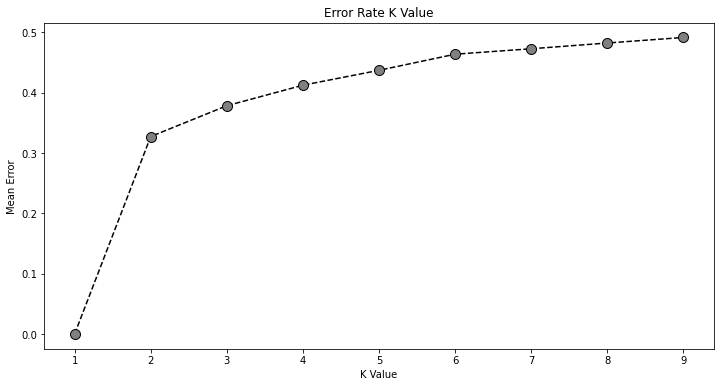

In [107]:
## We want to find the K with the smallest error that is not one

plt.figure(figsize=(12, 6))
plt.plot(range(1, 10)
         , errors
         , color='black'
         , linestyle='dashed'
         , marker='o'
         , markerfacecolor='grey'
         , markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [108]:
## 3 is the best K so we run the model with 3
## three is the K with the lowest error rate after 1

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [109]:
## predict on test

y_pred = classifier.predict(X_test)

## classification report

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[79 10 13  7  6 14 21  5  8]
 [16 66 16 17 12 10  6 15  6]
 [27 17 78 11 12  5  2  6  5]
 [12 27 16 60 13 14  0 12  9]
 [16 32 17 15 50  9  5 10  9]
 [34 13 10 10 12 45 21  8 10]
 [24 11  7 15 11 16 58  9 12]
 [16 23 20 18 18  5  8 45 11]
 [26 21 18 23  7 10  8  5 45]]
              precision    recall  f1-score   support

           1       0.32      0.48      0.38       163
           2       0.30      0.40      0.34       164
           3       0.40      0.48      0.44       163
           4       0.34      0.37      0.35       163
           5       0.35      0.31      0.33       163
           6       0.35      0.28      0.31       163
           7       0.45      0.36      0.40       163
           8       0.39      0.27      0.32       164
           9       0.39      0.28      0.32       163

    accuracy                           0.36      1469
   macro avg       0.37      0.36      0.36      1469
weighted avg       0.37      0.36      0.36      1469



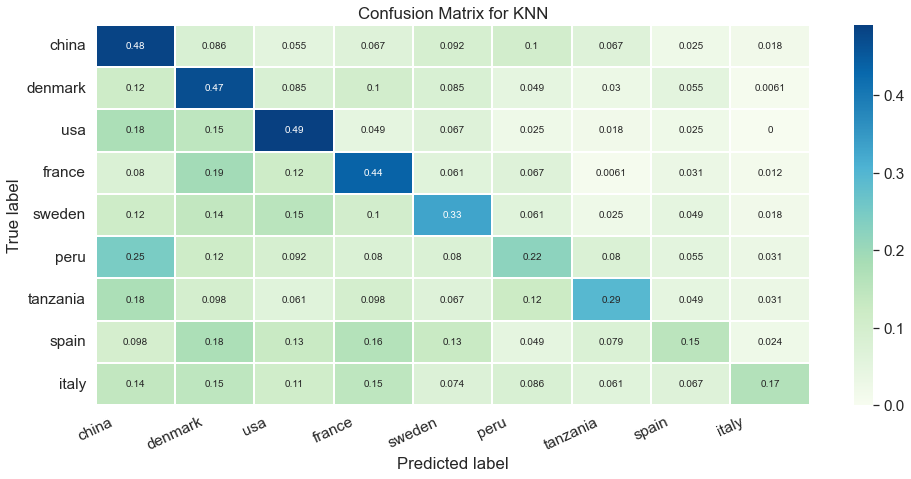

In [126]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.GnBu, linewidths=0.2)

# Add labels to the plot
class_names = ['china', 'denmark', 'usa', 'france', 'sweden', 'peru', 'tanzania', 'spain', 'italy']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for KNN')
plt.show()

## KNN (PCA) --> BEST MODEL

In [127]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)
pca.fit(X_train)

train_pca = pca.transform(X_train)
test_pca = pca.transform(X_test)

In [128]:
train_pca.shape

(5875, 40)

In [129]:
## 2 is the best K so we run the model with 2
## 2 is the K with the lowest error rate after 1

classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(train_pca, y_train)

## predict on test

y_pred = classifier.predict(test_pca)

## classification report

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[79 14  9 11 15 17 11  4  3]
 [19 77 14 17 14  8  5  9  1]
 [29 24 80  8 11  4  3  4  0]
 [13 31 19 71 10 11  1  5  2]
 [19 23 25 17 54 10  4  8  3]
 [40 19 15 13 13 36 13  9  5]
 [29 16 10 16 11 20 48  8  5]
 [16 29 21 27 21  8 13 25  4]
 [23 24 18 24 12 14 10 11 27]]
              precision    recall  f1-score   support

           1       0.30      0.48      0.37       163
           2       0.30      0.47      0.37       164
           3       0.38      0.49      0.43       163
           4       0.35      0.44      0.39       163
           5       0.34      0.33      0.33       163
           6       0.28      0.22      0.25       163
           7       0.44      0.29      0.35       163
           8       0.30      0.15      0.20       164
           9       0.54      0.17      0.25       163

    accuracy                           0.34      1469
   macro avg       0.36      0.34      0.33      1469
weighted avg       0.36      0.34      0.33      1469



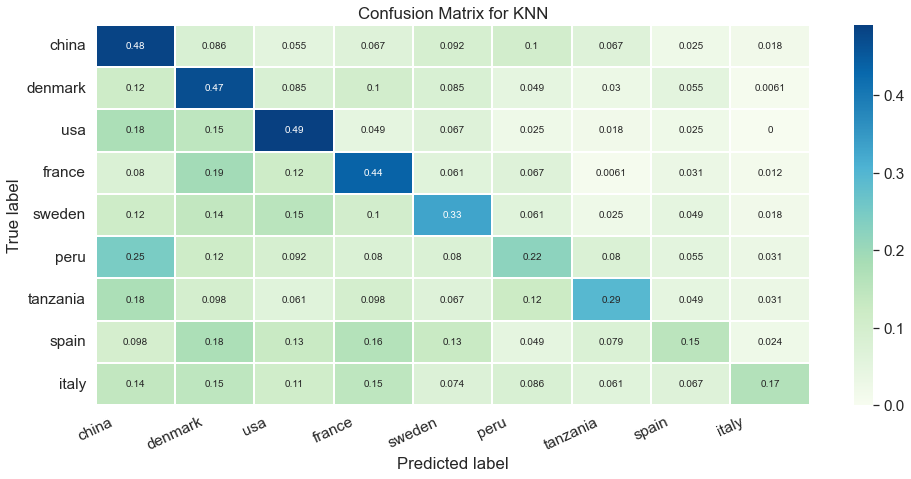

In [130]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.GnBu, linewidths=0.2)

# Add labels to the plot
class_names = ['china', 'denmark', 'usa', 'france', 'sweden', 'peru', 'tanzania', 'spain', 'italy']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for KNN')
plt.show()

With Feature reduction the model is still as bad at predicting countries

## RANDOM FOREST

In [132]:
# Create Random Forest Classifier
rf = RandomForestClassifier()

# Parameters for Grid Search
rf_params = {
    'n_estimators': [200, 250, 300, 350, 400, 500, 600, 700, 800, 1000],
    'max_depth': [5, 6, 7, 8, 9, 10,11,12],
}


gs = GridSearchCV(rf, param_grid=rf_params, cv=5)
gs.fit(X_train, y_train)

print(gs.best_score_)
gs.best_params_

0.2498723404255319


{'max_depth': 12, 'n_estimators': 300}

The best parameters are n_estimators:300 and max_depth:12

In [133]:
# Instantiate and fit the RandomForestClassifier
forest = RandomForestClassifier(max_depth= 12, n_estimators= 300, random_state=42)
forest.fit(X_train, y_train)

# Make predictions for the test set
y_pred_test = forest.predict(X_test)

### Model performance

In [134]:
# View accuracy score
accuracy_score(y_test, y_pred_test)

0.24370319945541186

The model accuracy is pretty low!!

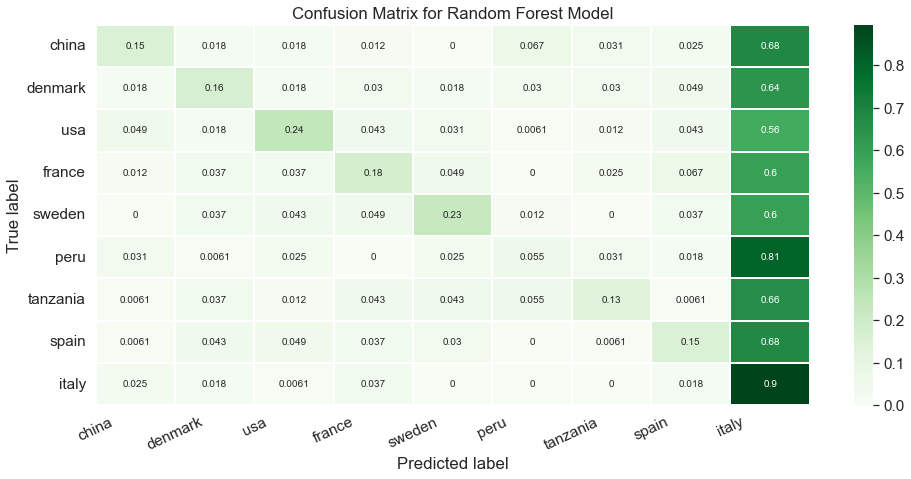

In [135]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['china', 'denmark', 'usa', 'france', 'sweden', 'peru', 'tanzania', 'spain', 'italy']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [136]:
# The most important features are:
importance = list(zip(X.columns, list(forest.feature_importances_)))

# Sort features by importance
imp_sorted= sorted(importance, key= lambda x:x[1], reverse=True)
imp_sorted

[(29, 0.0667663346265309),
 (16, 0.05024003087166881),
 (39, 0.04090718714443597),
 (32, 0.04073335549600979),
 (14, 0.03963666233305617),
 (52, 0.03908500662177233),
 (43, 0.03833091108187319),
 (18, 0.0355613102769536),
 (4, 0.03472217294801839),
 (46, 0.033831683015061516),
 (10, 0.032534626474897375),
 (2, 0.03229658579234862),
 (36, 0.032097979879354595),
 (28, 0.029198545788174986),
 (7, 0.029027072017916277),
 (31, 0.027580102666484755),
 (35, 0.026001992792379223),
 (22, 0.02508821449567519),
 (37, 0.024903479827692553),
 (8, 0.024281169960228565),
 (12, 0.02419825168380387),
 (54, 0.02382285996462559),
 (1, 0.023612290137919777),
 (45, 0.02303732904820852),
 (30, 0.017844855160597143),
 (42, 0.01772874895964218),
 (27, 0.0167637960811135),
 (13, 0.015163014139905322),
 (47, 0.013711685601945191),
 (6, 0.01324956380932171),
 (3, 0.013212290210166198),
 (40, 0.01148846446938926),
 (48, 0.011191552274686826),
 (11, 0.008523900815228204),
 (50, 0.008486666192248186),
 (17, 0.00838

## Random Forest (PCA)

In [137]:
# Create Random Forest Classifier
rf = RandomForestClassifier()

# Parameters for Grid Search
rf_params = {
    'n_estimators': [200, 250, 300, 350, 400, 500, 600, 700, 800, 1000],
    'max_depth': [5, 6, 7, 8, 9, 10,11,12],
}


gs = GridSearchCV(rf, param_grid=rf_params, cv=5)
gs.fit(train_pca, y_train)

print(gs.best_score_)
gs.best_params_

0.3555744680851064


{'max_depth': 12, 'n_estimators': 700}

In [138]:
# Instantiate and fit the RandomForestClassifier
forest = RandomForestClassifier(max_depth= 12, n_estimators= 700, random_state=42)
forest.fit(train_pca, y_train)

# Make predictions for the test set
y_pred_test = forest.predict(test_pca)

## Model performance

In [140]:
# View accuracy score
accuracy_score(y_test, y_pred_test)

0.35602450646698436

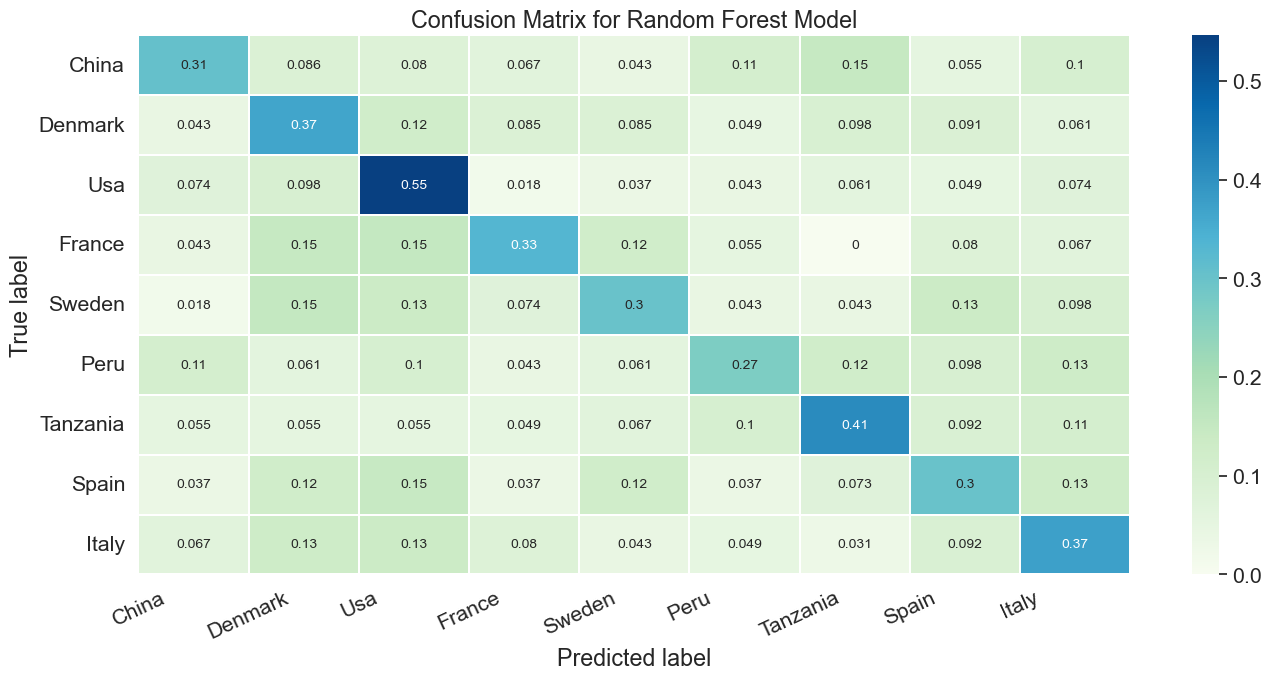

In [153]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.GnBu, linewidths=0.2)

# Add labels to the plot
class_names = ['China', 'Denmark', 'Usa', 'France', 'Sweden', 'Peru', 'Tanzania', 'Spain', 'Italy']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [181]:
# The most important features are:
importance = list(zip(X.columns, list(forest.feature_importances_)))

# Sort features by importance
imp_sorted= sorted(importance, key= lambda x:x[1], reverse=True)
imp_sorted

[(47, 0.04705291285797289),
 (46, 0.039260801728808),
 (45, 0.035533385427308474),
 (1, 0.034062783091144536),
 (42, 0.03208454528083778),
 (43, 0.031106132523339484),
 (41, 0.030229246470074737),
 (40, 0.02916582935278877),
 (39, 0.027620018910394666),
 (32, 0.026950461273266904),
 (35, 0.02635730764744124),
 (34, 0.02627013903889572),
 (38, 0.02624796874893816),
 (36, 0.025973092246139858),
 (33, 0.025180014392701292),
 (37, 0.024491580817815738),
 (16, 0.0244576785238591),
 (28, 0.024339927250983207),
 (12, 0.024320163728754358),
 (8, 0.023227332713291988),
 (9, 0.023188806293299776),
 (3, 0.022511164157457714),
 (11, 0.02241307719217776),
 (4, 0.02240905220782869),
 (7, 0.0223873927269471),
 (2, 0.022308222706808885),
 (6, 0.022243524528999737),
 (15, 0.021842687301251665),
 (14, 0.02181379506014605),
 (13, 0.021775562526162966),
 (31, 0.021595786344147633),
 (30, 0.021266519440286895),
 (5, 0.020346895246314445),
 (10, 0.020308397070165757),
 (29, 0.019170045340298446),
 (27, 0.01

## PLOT of the two PCs that explain most of the variance

In [143]:
scalar = StandardScaler()

# Fit on training set only.
scaler.fit(X)

# Apply transform to both the training set and the test set.
X_trans = scaler.transform(X)

In [144]:
# Make an instance of the Model
pca = PCA(2)
# fit PCA on scaled data
pca.fit(X_trans)

PCA(n_components=2)

In [145]:
pca_viz = pca.transform(X_trans)

In [146]:
pca_viz= pd.DataFrame(pca_viz, columns=['PC1','PC2'])

In [147]:
pca_viz['country_n']= y

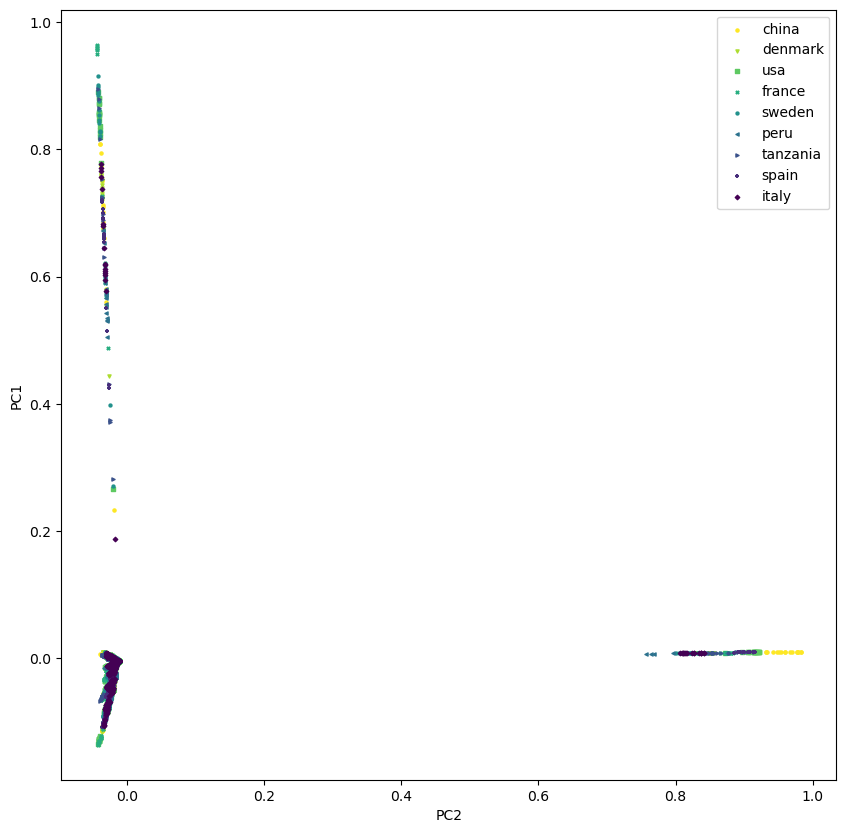

In [151]:
plt.style.use(['default'])
plt.figure(figsize=(10,10))

markersss= ['o','v','s','x','8','<','>','+','D']
colors=['#fde725','#addc30','#5ec962','#28ae80','#21918c','#2c728e','#3b528b','#472d7b','#440154']
class_names = ['china', 'denmark', 'usa', 'france', 'sweden', 'peru', 'tanzania', 'spain', 'italy']

for i in range(9): #for each of the 7 features 
    mi = markersss[i] #marker for ith feature 
    xi = pca_viz[pca_viz['country_n']==i+1][['PC1']] #x array for ith feature .. here is where you would generalize      different x for every feature
    yi = pca_viz[pca_viz['country_n']==i+1][['PC2']] #y array for ith feature 
    ci = colors[i] #color for ith feature 
    plt.scatter(xi,yi,marker=mi, color=ci,s=5, label=class_names[i]) 


#scatter=plt.scatter(pca_viz.PC1, pca_viz.PC2, c=pca_viz.country_n, cmap='viridis', s=55)

plt.ylabel('PC1')
plt.xlabel('PC2')

#class_names = ['china', 'denmark', 'usa', 'france', 'sweden', 'peru', 'tanzania', 'spain', 'italy']

plt.legend()

plt.show()

In [200]:
pip install plotly==5.5.0

     |████████████████████████████████| 26.5 MB 5.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


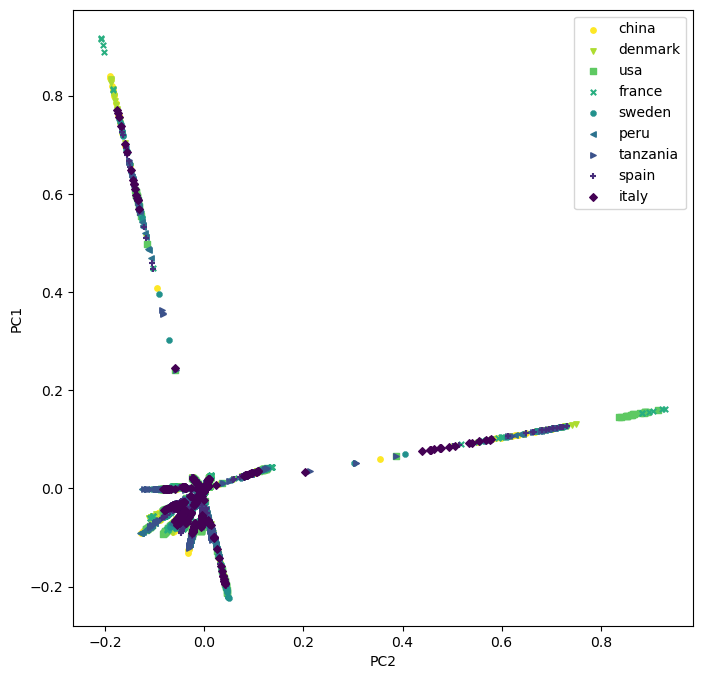

In [211]:
import plotly.express as px

# Make an instance of the Model
pca = PCA(4)
# fit PCA on scaled data
pca.fit(X_trans)
pca_viz = pca.transform(X_trans)

pca_viz= pd.DataFrame(pca_viz, columns=['PC1','PC2','PC3','PC4'])

pca_viz['country_n']= y

plt.style.use(['default'])
plt.figure(figsize=(8,8))

markersss= ['o','v','s','x','8','<','>','+','D']
colors=['#fde725','#addc30','#5ec962','#28ae80','#21918c','#2c728e','#3b528b','#472d7b','#440154']
class_names = ['china', 'denmark', 'usa', 'france', 'sweden', 'peru', 'tanzania', 'spain', 'italy']

for i in range(9): #for each of the 7 features 
    mi = markersss[i] #marker for ith feature 
    xi = pca_viz[pca_viz['country_n']==i+1][['PC3']] #x array for ith feature .. here is where you would generalize      different x for every feature
    yi = pca_viz[pca_viz['country_n']==i+1][['PC4']] #y array for ith feature 
    ci = colors[i] #color for ith feature 
    plt.scatter(xi,yi,marker=mi, color=ci,s=15, label=class_names[i]) 


#scatter=plt.scatter(pca_viz.PC1, pca_viz.PC2, c=pca_viz.country_n, cmap='viridis', s=55)

plt.ylabel('PC1')
plt.xlabel('PC2')

#class_names = ['china', 'denmark', 'usa', 'france', 'sweden', 'peru', 'tanzania', 'spain', 'italy']

plt.legend()

plt.show()

## Lasso: most important features

LASSO, short for Least Absolute Shrinkage and Selection Operator, is a statistical formula whose main purpose is the feature selection and regularization of data models. 

Least Absolute Shrinkage and Selection Operator (LASSO) regression is a type of regularization method that penalizes with L1-norm. It basically imposes a cost to having large weights (value of coefficients). And its called L1 regularization, because the cost added, is proportional to the absolute value of weight coefficients. As a result, in the process of shrinking the coefficients, it eventually reduces the coefficients of certain unwanted features all the to zero. That is, it removes the unneeded variables altogether.

Best alpha using built-in LassoCV: 2.680016
Best score using built-in LassoCV: 0.005287
Lasso picked 5 variables and eliminated the other 43 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

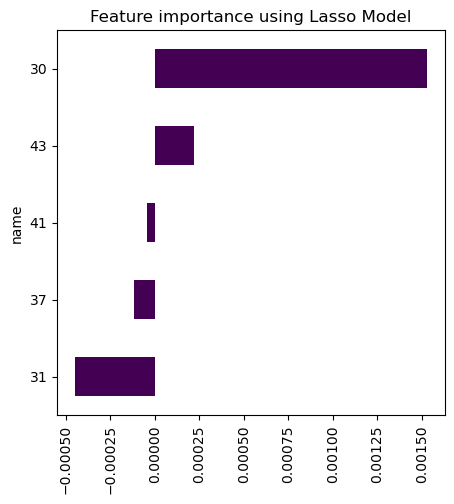

In [180]:
#https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso#Loading the dataset
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef[coef!=0].sort_values()


import matplotlib
matplotlib.pyplot.style.use(['default'])
matplotlib.pyplot.figure(figsize=(5,5))

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh", cmap='viridis')
matplotlib.pyplot.xticks(rotation='vertical')
plt.title("Feature importance using Lasso Model")

In [187]:
feature_tokeep=imp_coef.index

## KNN with Lasso features

In [188]:
## set X and y

X1 = df1.drop(['country', 'country_n'], axis=1)
y = df1['country_n']

In [190]:
X1=X1[feature_tokeep]

In [191]:
X1

name,31,37,41,43,30
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
7339,0.0,0.0,0.0,0.0,0.0
7340,0.0,0.0,0.0,0.0,0.0
7341,0.0,0.0,0.0,0.0,0.0
7342,0.0,0.0,0.0,0.0,0.0


In [192]:
## Train test split

X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.20, random_state=124, stratify=y) # stratify means that it evenly take from each target group (y)




In [193]:
## Scaler : another tool to improve our models
#https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X1_train) # fitting just on train

X1_train = scaler.transform(X1_train) # apply transformation on train
X1_test = scaler.transform(X1_test) # apply transformation on test

In [194]:
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X1_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [195]:
## predict on test

y_pred1 = classifier.predict(X1_test)

## classification report

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[ 10   4   1 145   1   2   0   0   0]
 [  3   8   0 148   3   0   2   0   0]
 [  1   5   8 147   2   0   0   0   0]
 [  2   2   1 152   1   5   0   0   0]
 [  1   4   3 147   7   0   1   0   0]
 [  2   3   1 150   0   4   2   1   0]
 [  1   3   0 151   0   2   6   0   0]
 [  1   3   2 149   2   1   1   5   0]
 [  1   1   0 150   1   2   1   1   6]]
              precision    recall  f1-score   support

           1       0.45      0.06      0.11       163
           2       0.24      0.05      0.08       164
           3       0.50      0.05      0.09       163
           4       0.11      0.93      0.20       163
           5       0.41      0.04      0.08       163
           6       0.25      0.02      0.04       163
           7       0.46      0.04      0.07       163
           8       0.71      0.03      0.06       164
           9       1.00      0.04      0.07       163

    accuracy                           0.14      1469
   macro avg       0.46      0.14      0.09      146

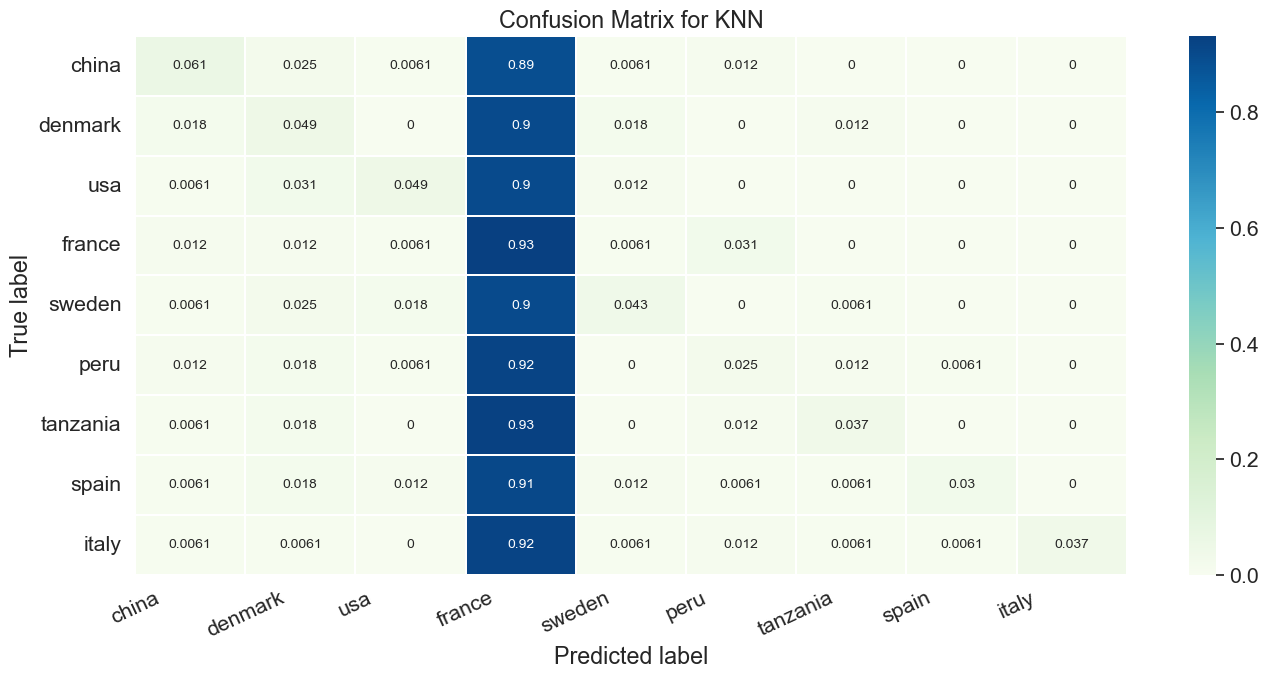

In [197]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred1)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.GnBu, linewidths=0.2)

# Add labels to the plot
class_names = ['china', 'denmark', 'usa', 'france', 'sweden', 'peru', 'tanzania', 'spain', 'italy']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for KNN')
plt.show()